# Build and Evaluate a Logistic Regression Model

A logistic regression is a type of model which can be used when predicting a categorial outcome. Specifically, it outputs a predicted probability that an observation is in one class or the other.

In this notebook, you'll see how to build a logistic regression model to predict presence or absence of heart disease in a patient based on 13 characteristics.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heart = pd.read_csv('../data/Heart.csv')

In [ ]:
heart.shape

In [ ]:
heart.head(2)

The variables are as follows:

|Variable | Description |
|---|---|
| Age | age in years |
| Sex | Sex (0 = female; 1 = male;) |
| ChestPain | chest pain type |
| RestBP | resting blood pressure (in mm Hg on admission to the hospital) |
| Chol | serum cholestoral in mg/dl |
| Fbs | fasting blood sugar > 120 mg/dl (1 = true; 0 = false) |
| RestECG | resting electrocardiographic results (0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes' criteria) |
| MaxHR | maximum heart rate achieved |
| ExAng | exercise induced angina (0 = no, 1 = yes;) |
| Oldpeak | ST depression induced by exercise relative to rest |
| Slope | the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping) |
| Ca | number of major vessels (0-3) colored by flourosopy |
| Thal | Thallium stress test  | 
| AHD | Presence of heart disease (target) |

In [5]:
heart['AHD'].value_counts()

No     160
Yes    137
Name: AHD, dtype: int64

We can see that 137 patients in our data do have a heart disease diagnosis and 160 do not.

First, let's do some exploratory analysis to see how the other variables relate to the target.

In [6]:
pd.crosstab(heart['Sex'], heart['AHD'])

AHD,No,Yes
Sex,,
0,71,25
1,89,112


In [7]:
pd.crosstab(heart['Sex'], heart['AHD'], normalize = 'index')

AHD,No,Yes
Sex,,
0,0.739583,0.260417
1,0.442786,0.557214


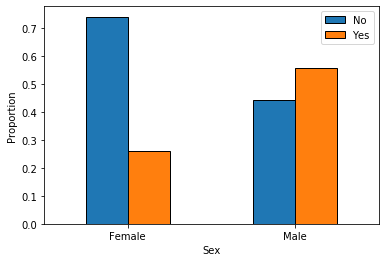

In [8]:
ax = pd.crosstab(heart['Sex'], heart['AHD'], normalize = 'index').plot(kind = 'bar', 
                                                                       edgecolor = 'black',
                                                                      figsize = (6,4))
plt.xticks(rotation = 0)
ax.set_xticklabels(['Female', 'Male'])
plt.legend(loc = 'upper right')
plt.ylabel('Proportion');

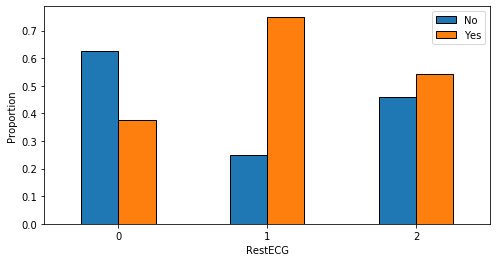

In [9]:
pd.crosstab(heart['RestECG'], heart['AHD'], normalize = 'index').plot(kind = 'bar', 
                                                                       edgecolor = 'black',
                                                                      figsize = (8,4))
plt.xticks(rotation = 0)
plt.legend(loc = 'upper right')
plt.ylabel('Proportion');

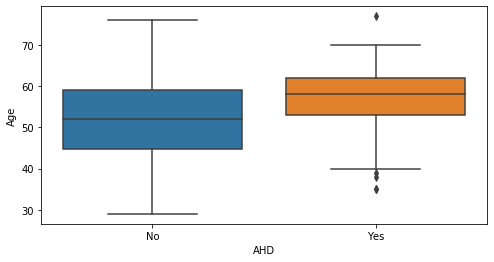

In [10]:
plt.figure(figsize = (8,4))
sns.boxplot(data = heart,
           x = 'AHD',
           y = 'Age');

We've got several categorical variables. In order to use these with scikit-learn models, we'll need to encode them as a number. 

To accomplish this, we can use the `get_dummies` method.

In [11]:
categorical_variables = ['ChestPain', 'RestECG', 'Slope', 'Thal']
heart = pd.get_dummies(heart, columns = categorical_variables)

In [12]:
heart.head()

,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,Ca,AHD,...,ChestPain_typical,RestECG_0,RestECG_1,RestECG_2,Slope_1,Slope_2,Slope_3,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,150,0,2.3,0.0,No,...,1,0,0,1,0,0,1,1,0,0
1,67,1,160,286,0,108,1,1.5,3.0,Yes,...,0,0,0,1,0,1,0,0,1,0
2,67,1,120,229,0,129,1,2.6,2.0,Yes,...,0,0,0,1,0,1,0,0,0,1
3,37,1,130,250,0,187,0,3.5,0.0,No,...,0,1,0,0,0,0,1,0,1,0
4,41,0,130,204,0,172,0,1.4,0.0,No,...,0,0,0,1,1,0,0,0,1,0


Let's start with a simple model - predicting heart disease based on age.

In [13]:
X = heart[['Age']]                 # Predictor variable (as a DataFrame)
y = heart['AHD']                   # Target

The main objective is to have a model which makes good predictions on _unseen_ data. Therefore, in order to evaluate how good a model is, it is necessary to set aside some data as a test set for evaulation purposes. This can be accomplished using the `train_test_split` function.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,     # Keep the same proportions of the target in the training and test data
                                                    test_size = 0.25,
                                                    random_state = 321)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logreg = LogisticRegression()         # Create a logistic regression model
logreg.fit(X_train, y_train)          # Fit it to the training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

To understand the model, we can look at its coefficients.

In [18]:
logreg.intercept_

array([-2.90727934])

In [19]:
logreg.coef_

array([[0.04973534]])

In [20]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [21]:
i = 10

print('Patient Information:\n{}'.format(X_test.iloc[i]))
print('---------------------------------')
print('Predicted Probability of Heart Disease: {}'.format(y_pred_prob[i]))
print('Actual: {}'.format(y_test.iloc[i]))

Patient Information:
Age    41
Name: 114, dtype: int64
---------------------------------
Predicted Probability of Heart Disease: 0.2956434510766427
Actual: No


One way to analyze your model is to look at the receiver operating characteristic (ROC) curve. This shows how the true positive rate and false positive rate change as the prediction threshold changes.

This value can be interpreted as how likely the model is to assign a higher probability to a positive observation compared to a negative one.

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve

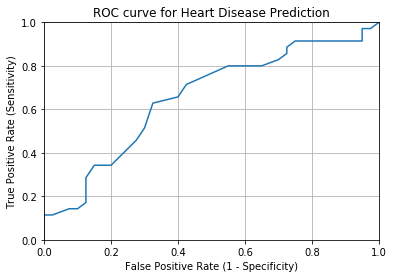

In [23]:
fp_rate, tp_rate, thresholds = roc_curve(y_test == 'Yes', y_pred_prob)

plt.plot(fp_rate, tp_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart Disease Prediction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### AUC - percentage of the ROC plot that is under the curve

A perfect model would have AUC = 1.

In [24]:
roc_auc_score(y_test, y_pred_prob)

0.6542857142857144

## Analyzing Predictions

To generate predictions, you can use the `predict` method of your model.

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
from cm import plot_confusion_matrix

In [26]:
y_pred = logreg.predict(X_test)

In [27]:
confusion_matrix(y_test, y_pred)

array([[32,  8],
       [23, 12]])

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.58      0.80      0.67        40
         Yes       0.60      0.34      0.44        35

    accuracy                           0.59        75
   macro avg       0.59      0.57      0.56        75
weighted avg       0.59      0.59      0.56        75



TypeError: annotate() missing 1 required positional argument: 's'

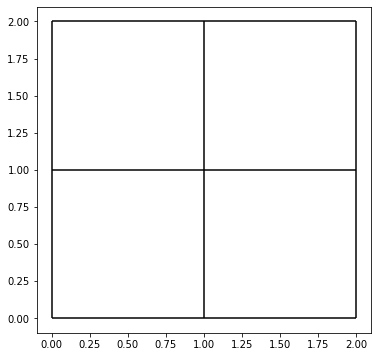

In [32]:
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'])

There are a number of metrics you can use to evalute your model. 

**Accuracy:** the total proportion of predictions which are correct.

TypeError: annotate() missing 1 required positional argument: 's'

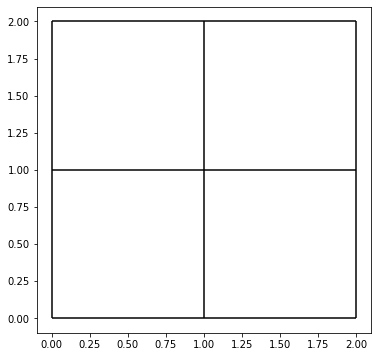

In [35]:
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')

**Sensitivity/True Positive Rate:** The proportion of true positives (in our case, people who survived) that are identified as such.

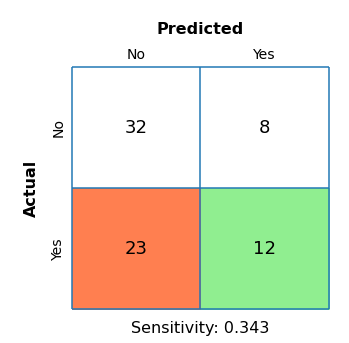

In [80]:
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'sensitivity')

**Specificity/True Negative Rate:** The proportion of true negatives (in our case, people who died) that are identified as such.

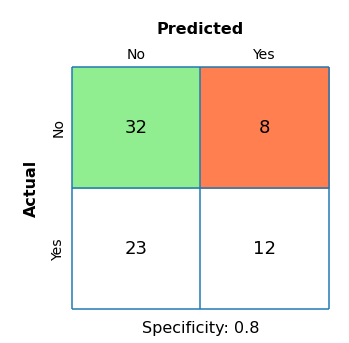

In [81]:
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'specificity')

**Precision:** The proportion of predicted positives that are actually positive (survived).

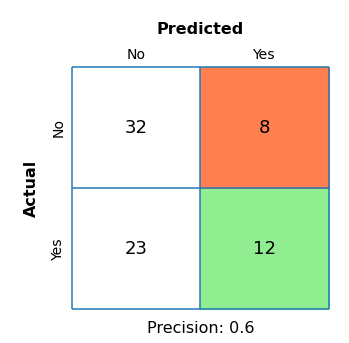

In [82]:
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'precision')

We have only used a single predictor in the above model. Let's see if we can improve our model by using the rest of the predictors.

In [36]:
X = heart.drop(columns = ['AHD'])
y = heart['AHD']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,     # Keep the same proportions of the target in the training and test data
                                                    test_size = 0.25,
                                                    random_state = 321)

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/smgroves/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

With so many predictors, it takes longer for the coefficients to converge. Let's increase the number of iterations.

In [39]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Let's take a look at the coefficients.

**Caution:** Our variables are on vastly different scales, so do not interpret the value of a coefficient as the importance.

In [40]:
coefficients = pd.DataFrame({
    'variable': X.columns,
    'coefficient': logreg.coef_[0]
})

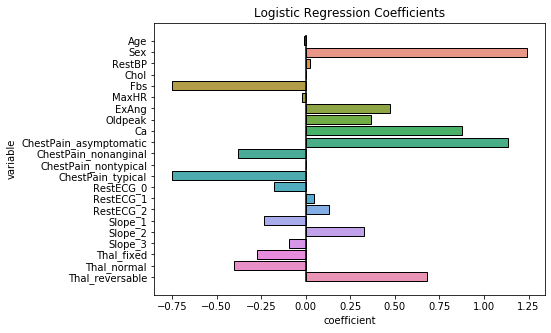

In [41]:
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(data = coefficients,
            x = 'coefficient', 
            y = 'variable', 
            ax = ax, 
            edgecolor = 'black')
plt.title('Logistic Regression Coefficients')

ymin, ymax = plt.ylim()
plt.vlines(x = 0, ymin = ymin, ymax = ymax);

Let's compare how our predictions change now that we are using all of the features.

In [42]:
y_pred_prob_all = logreg.predict_proba(X_test)[:,1]

In [43]:
i = 12

print('Patient Information:\n{}'.format(X_test.iloc[i]))
print('---------------------------------')
print('Old Predicted Probability: {}'.format(y_pred_prob[i]))
print('New Predicted Probability: {}'.format(y_pred_prob_all[i]))
print('Actual: {}'.format(y_test.iloc[i]))

Patient Information:
Age                        40.0
Sex                         1.0
RestBP                    110.0
Chol                      167.0
Fbs                         0.0
MaxHR                     114.0
ExAng                       1.0
Oldpeak                     2.0
Ca                          0.0
ChestPain_asymptomatic      1.0
ChestPain_nonanginal        0.0
ChestPain_nontypical        0.0
ChestPain_typical           0.0
RestECG_0                   0.0
RestECG_1                   0.0
RestECG_2                   1.0
Slope_1                     0.0
Slope_2                     1.0
Slope_3                     0.0
Thal_fixed                  0.0
Thal_normal                 0.0
Thal_reversable             1.0
Name: 29, dtype: float64
---------------------------------
Old Predicted Probability: 0.28539294041893054
New Predicted Probability: 0.9237497040335889
Actual: Yes


Now, let's look at the ROC curve and score.

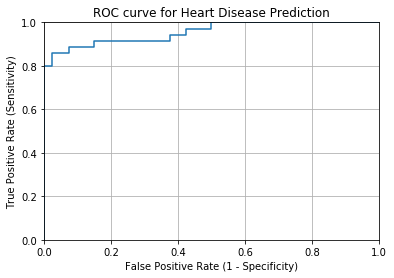

In [44]:
fp_rate, tp_rate, thresholds = roc_curve(y_test == 'Yes', y_pred_prob_all)

plt.plot(fp_rate, tp_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart Disease Prediction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [45]:
roc_auc_score(y_test, y_pred_prob_all)

0.955

Finally, let's look at the new accuracy score.

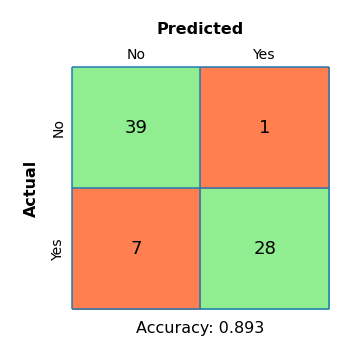

In [46]:
y_pred = logreg.predict(X_test)

plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')